# Data Projection For Tenure data

## PCA

In [78]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [79]:
import pandas as pd

In [80]:
df=pd.read_excel('./2011/Projection/Tenure_processed_2011.xlsx')
df

,Date,Local Authorities District,Geo Code,Owned: Owned outright,Owned: Owned with a mortgage or loan or shared ownership,Rented: Social rented,Rented: Private rented or living rent free,Sex,General Health Type,label
0,2011,Darlington,E06000005,8696,20310,4123,8164,Males,Very good or good health,1
1,2011,County Durham,E06000047,42450,94692,23071,28120,Males,Very good or good health,1
2,2011,Hartlepool,E06000001,6574,16687,5623,5469,Males,Very good or good health,1
3,2011,Middlesbrough,E06000002,9957,23175,8941,10808,Males,Very good or good health,1
4,2011,Northumberland,E06000057,29463,56224,16503,17950,Males,Very good or good health,1
...,...,...,...,...,...,...,...,...,...,...
2083,2011,Caerphilly,W06000018,3375,1547,2814,679,Females,Bad or very bad health,4
2084,2011,Blaenau Gwent,W06000019,1443,549,1324,375,Females,Bad or very bad health,4
2085,2011,Torfaen,W06000020,1401,691,1549,268,Females,Bad or very bad health,4
2086,2011,Monmouthshire,W06000021,1186,503,766,263,Females,Bad or very bad health,4


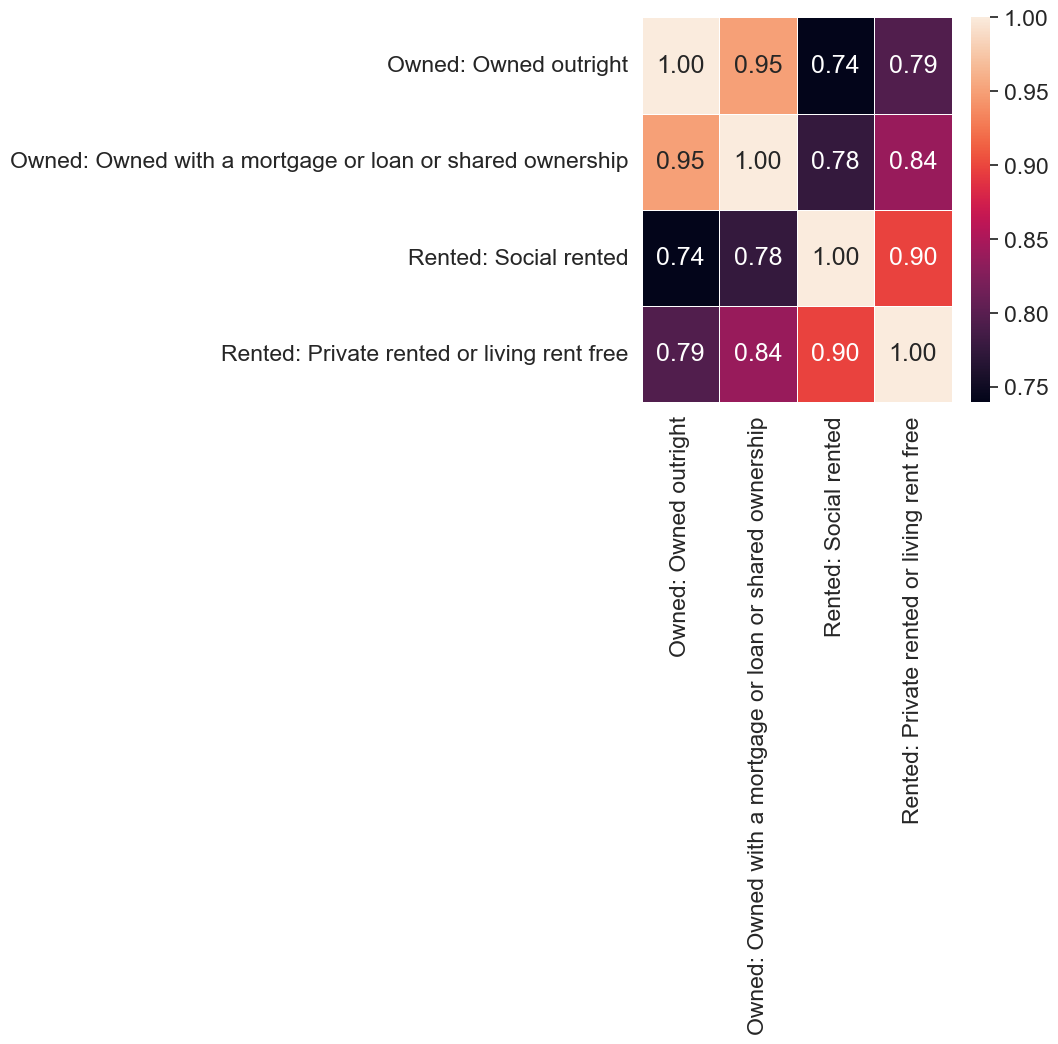

In [81]:
original_data=df.loc[:,'Owned: Owned outright':'Rented: Private rented or living rent free']
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(original_data.corr(),annot=True, linewidths=0.5,fmt='.2f',ax=ax)
plt.show()

In [82]:
label = df['label']
# scaler = StandardScaler()
scaler = MinMaxScaler()
data = scaler.fit_transform(original_data)
data = pd.DataFrame(data, columns=original_data.columns)
data

,Owned: Owned outright,Owned: Owned with a mortgage or loan or shared ownership,Rented: Social rented,Rented: Private rented or living rent free
0,0.103447,0.120376,0.049928,0.090633
1,0.505539,0.561276,0.279607,0.312285
2,0.078169,0.098900,0.068111,0.060700
3,0.118469,0.137358,0.108330,0.120000
4,0.350833,0.333256,0.199993,0.199327
...,...,...,...,...
2083,0.040061,0.009158,0.034061,0.007497
2084,0.017047,0.003242,0.016000,0.004121
2085,0.016546,0.004084,0.018728,0.002932
2086,0.013985,0.002970,0.009237,0.002877


In [83]:
data_T=data.T
covariance=np.cov(data_T)
eval, evec=np.linalg.eig(covariance)

In [84]:
print(eval)

[0.02929071 0.00281235 0.00042709 0.00071882]


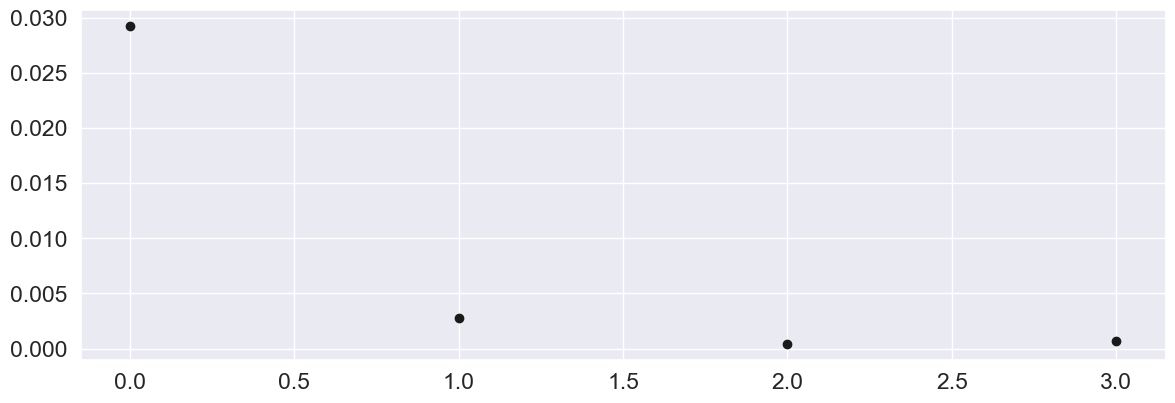

In [85]:
plt.figure()
plt.subplot(211)
plt.plot(eval,'ok')

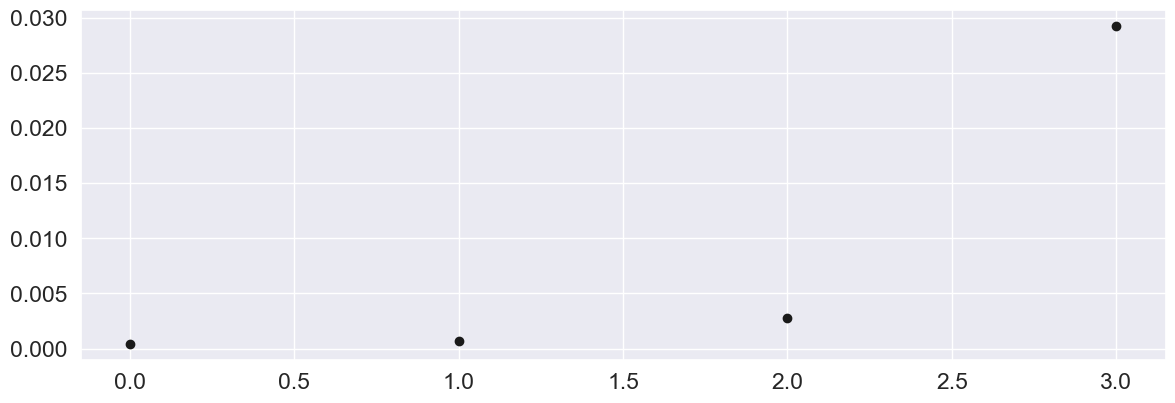

array([[ 0.66475598, -0.1752442 ,  0.5162341 , -0.51077521],
       [-0.72207278,  0.07533762,  0.40669846, -0.55455523],
       [-0.07494274, -0.72617455, -0.55058508, -0.40485823],
       [ 0.17633484,  0.66051816, -0.51473759, -0.51736544]])

In [86]:
eval, evec=np.linalg.eigh(covariance)
plt.subplot(212)
plt.plot(eval,'ok')
plt.show()
evec

In [87]:
sorted_eval = np.sort(eval)
eval = sorted_eval[::-1]  # reverse the order so that it is decreasing
print("Sorted eigenvalues " + str(eval))
ncols=len(data.columns)
print(ncols)

Sorted eigenvalues [0.02929071 0.00281235 0.00071882 0.00042709]
4


[0.8809511  0.96553561 0.98715494 1.        ]


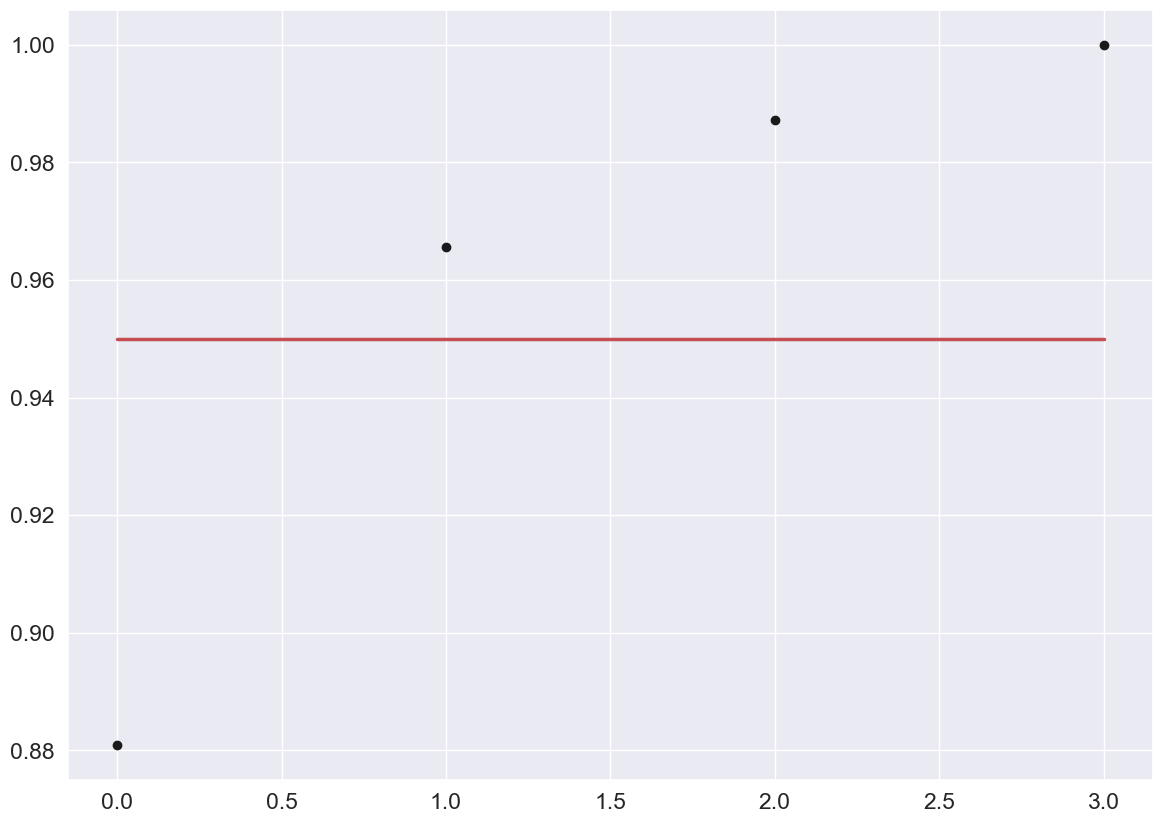

In [88]:
cumuleval=np.cumsum(eval)
total=np.sum(eval)
cumuleval=cumuleval/total
print(cumuleval)

plt.figure(3)
plt.plot(cumuleval, 'ok')
xvals = range(ncols)
plt.plot(xvals, 0.95*np.ones(np.shape(eval)), 'r-')
plt.show()

Explained variance ratio [0.8809511  0.08458451]


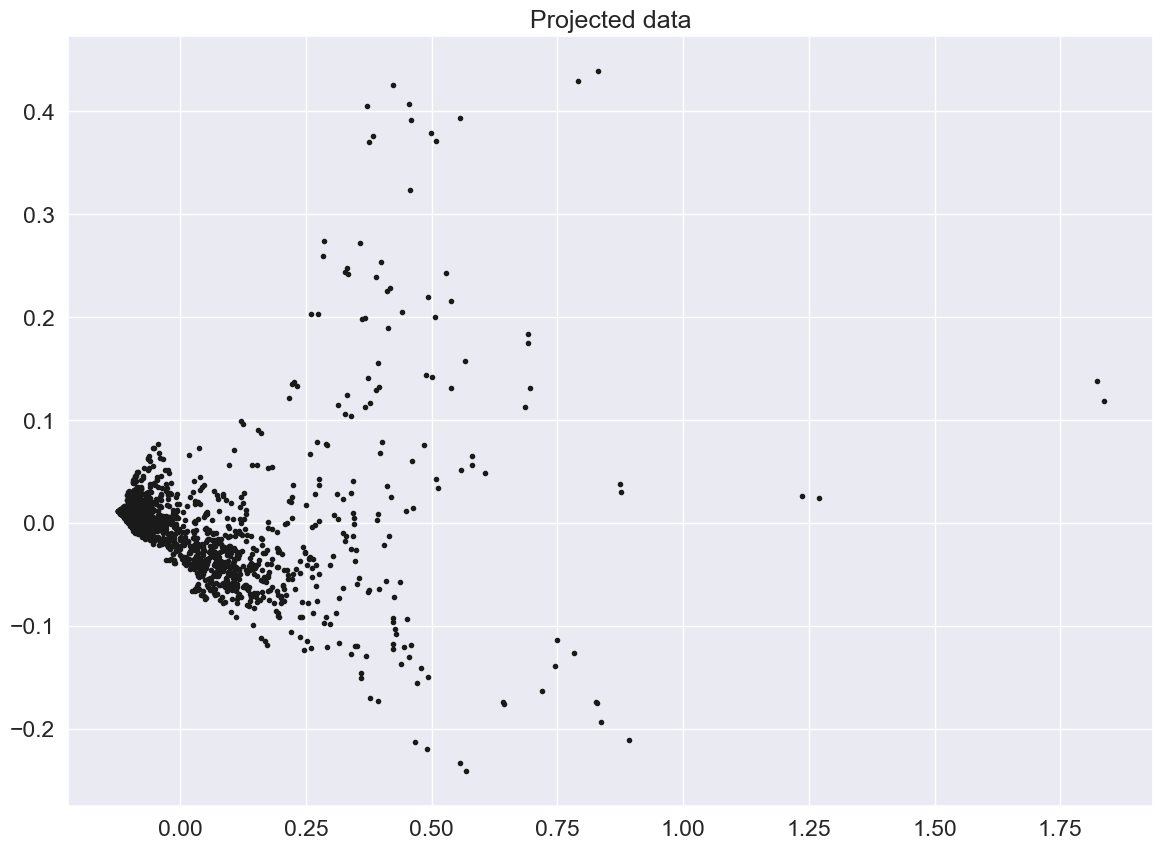

In [89]:
# Now apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data)
# This should equal the sum of the first two values in the cumulative proportion plot
print('Explained variance ratio '+ str(pca.explained_variance_ratio_))

# Project data onto first two principal components
projX = pca.transform(data)
plt.figure(4)
plt.plot(projX[:,0], projX[:,1], 'k.')
plt.title('Projected data')
plt.show()

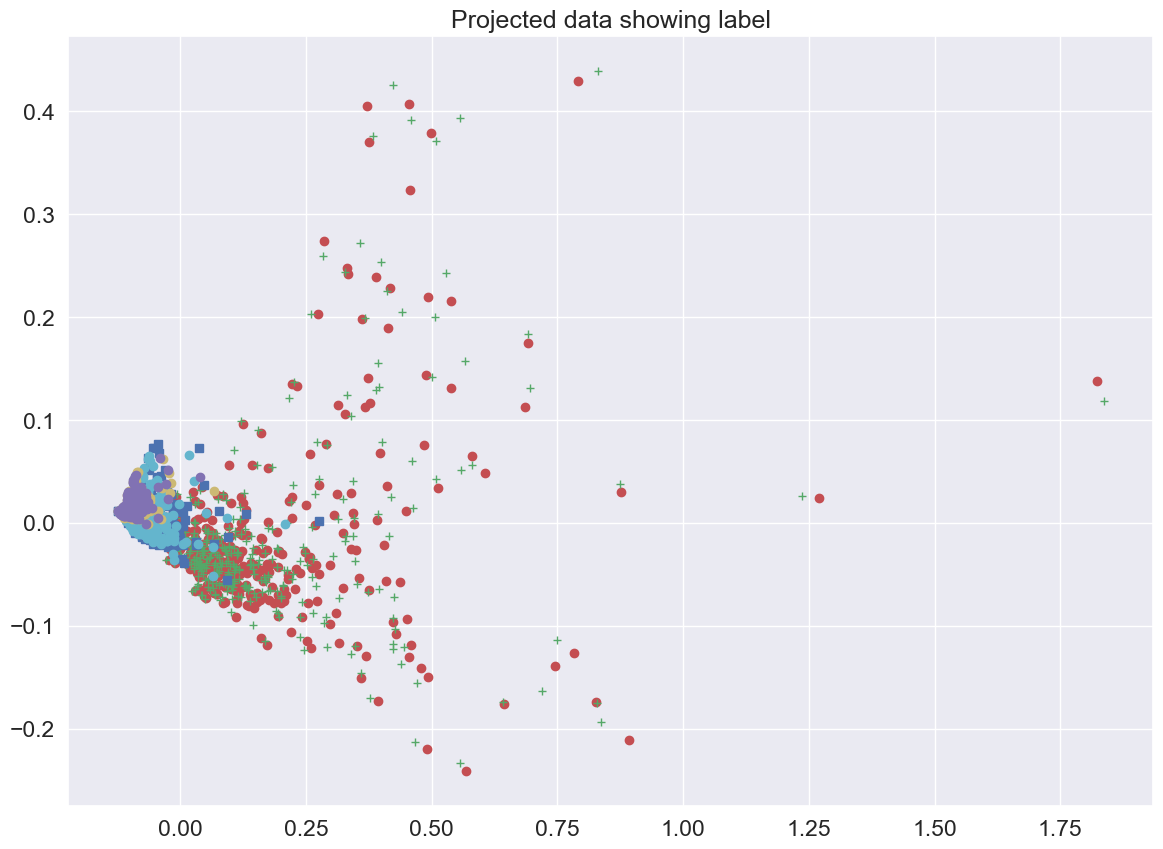

In [90]:
# Now plot the data with a different mark for each label
marks = ('ro', 'g+', 'bs','co','yo','mo')


plt.figure(6)
for n in range(0, 6, 1) :
    projClass = projX[np.equal(label, n*np.ones(label.shape))]
    plt.plot(projClass[:,0], projClass[:,1], marks[n])

plt.title('Projected data showing label')
plt.show()

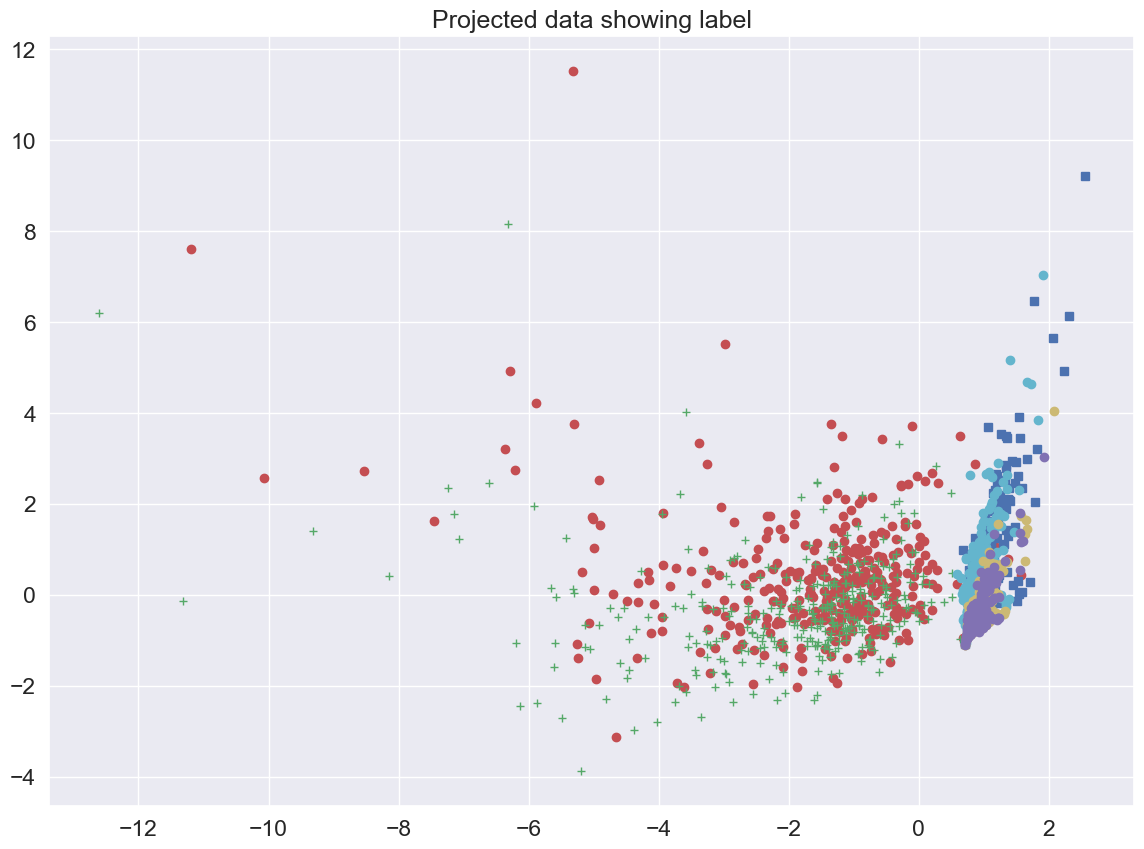

In [91]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(data, label)
projX = clf.transform(data)

# Now plot the data with a different mark for each label
marks = ('ro', 'g+', 'bs','co','yo','mo')
plt.figure()
for n in range(0, 6, 1) :
    projClass = projX[np.equal(label, n*np.ones(label.shape))]
    plt.plot(projClass[:,0], projClass[:,1], marks[n])

plt.title('Projected data showing label')
plt.show()

In [92]:
projX.shape

(2088, 4)

## UMAP

In [93]:
import umap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

RS=1729

In [101]:
data

,Owned: Owned outright,Owned: Owned with a mortgage or loan or shared ownership,Rented: Social rented,Rented: Private rented or living rent free
0,0.103447,0.120376,0.049928,0.090633
1,0.505539,0.561276,0.279607,0.312285
2,0.078169,0.098900,0.068111,0.060700
3,0.118469,0.137358,0.108330,0.120000
4,0.350833,0.333256,0.199993,0.199327
...,...,...,...,...
2083,0.040061,0.009158,0.034061,0.007497
2084,0.017047,0.003242,0.016000,0.004121
2085,0.016546,0.004084,0.018728,0.002932
2086,0.013985,0.002970,0.009237,0.002877


In [102]:
umap_2d = umap.UMAP(random_state=RS)
umap_2d.fit(data)
embedding=umap_2d.transform(data)
embedding

array([[-4.332226 ,  5.1822667],
       [-1.9310402, 11.318137 ],
       [-3.5928993,  4.2331862],
       ...,
       [ 9.248697 ,  2.123011 ],
       [12.631556 ,  5.9302645],
       [ 9.474056 ,  0.9493571]], dtype=float32)

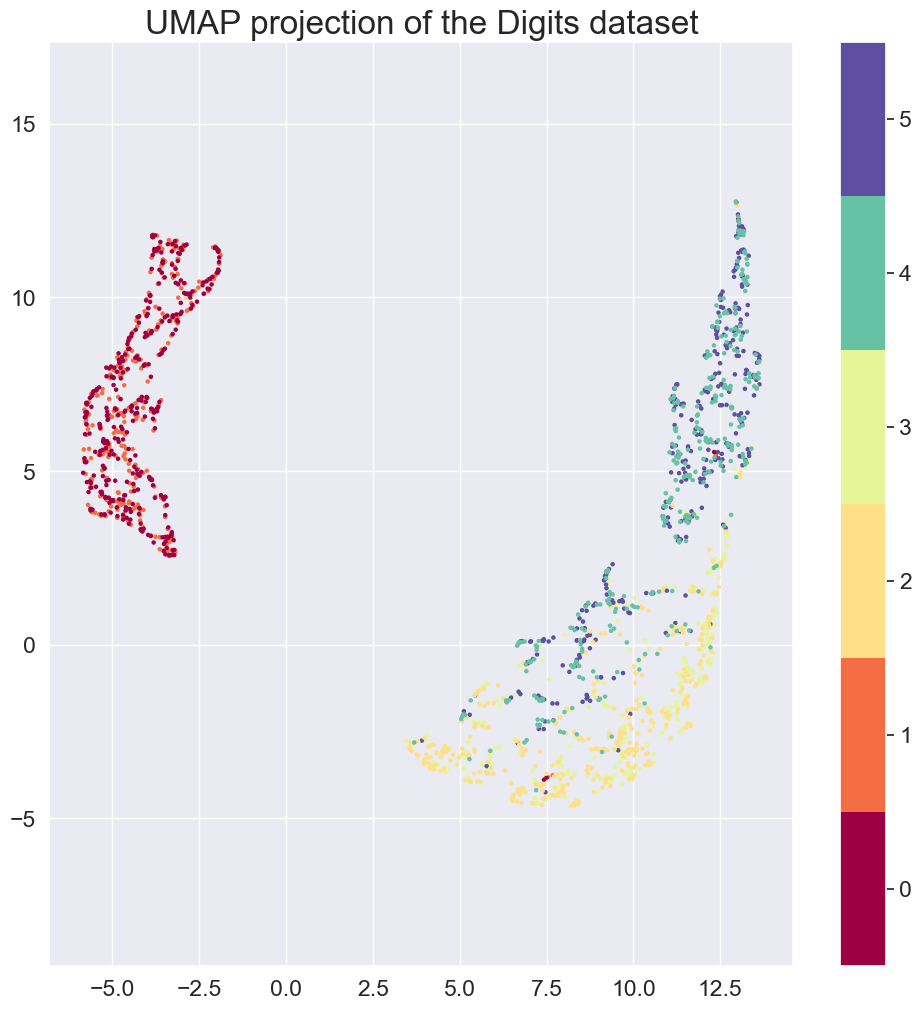

In [103]:
plt.figure(figsize=(12, 12))

plt.scatter(embedding[:, 0], embedding[:, 1], c=label, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(7)-0.5).set_ticks(np.arange(6))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

In [104]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title='', init = 'spectral'):
    fit = umap.UMAP(
        random_state = 42,
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric,
        init = init
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=data)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=label,s=6)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], c=data, s=4)
    plt.title(title, fontsize=18)

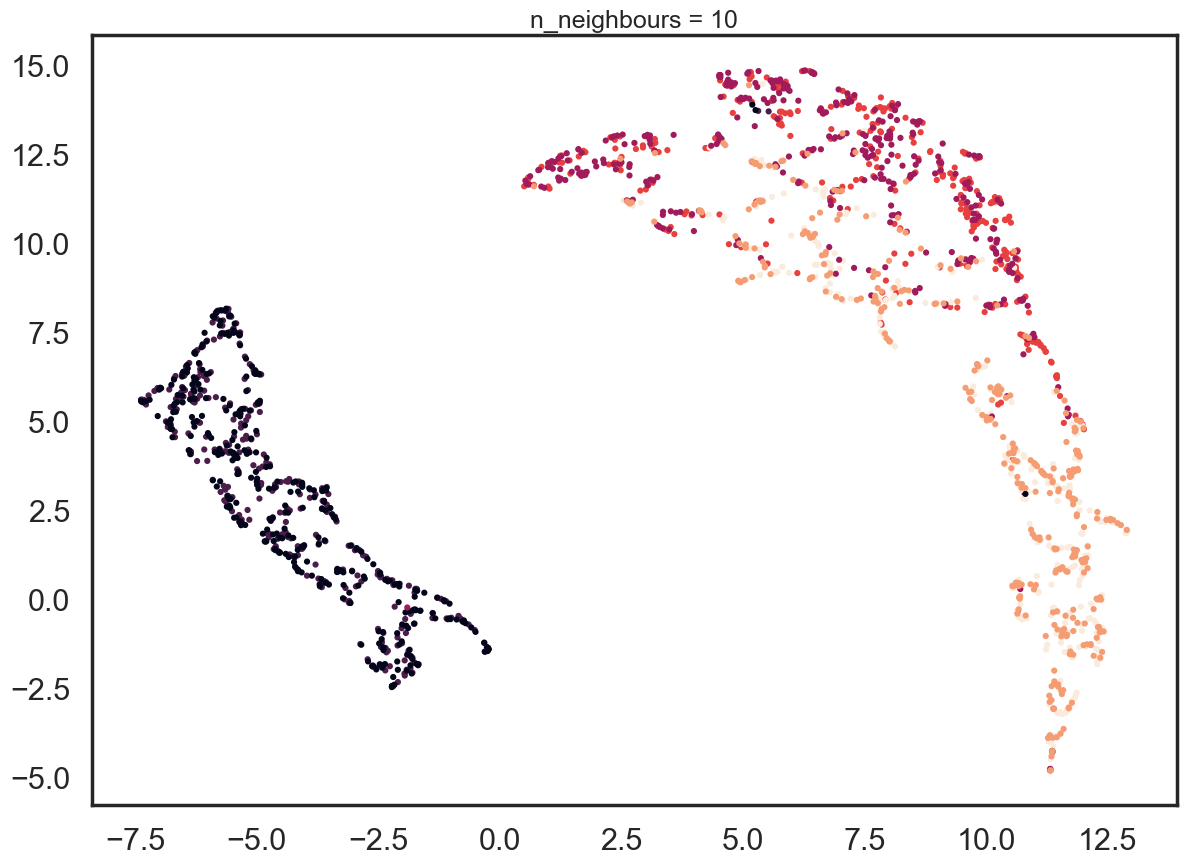

In [105]:
# Exploration of parameters
import seaborn as sns

sns.set(style='white', context='poster', rc={'figure.figsize':(14,10)})
np.random.seed(42)
# data = np.random.rand(800, 4)

umap_fit=umap.UMAP(random_state=RS)
umap_fit.fit(data)
u=umap_fit.transform(data)
n=10
draw_umap(n, title='n_neighbours = {}'.format(n))

## TSNE

In [76]:
import time
import pandas as pd
import numpy as np
import fashion_scatter as fs
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

%matplotlib inline

RS = 1729; # Fix the random state for t-SNE. This makes the lab results reproducible.

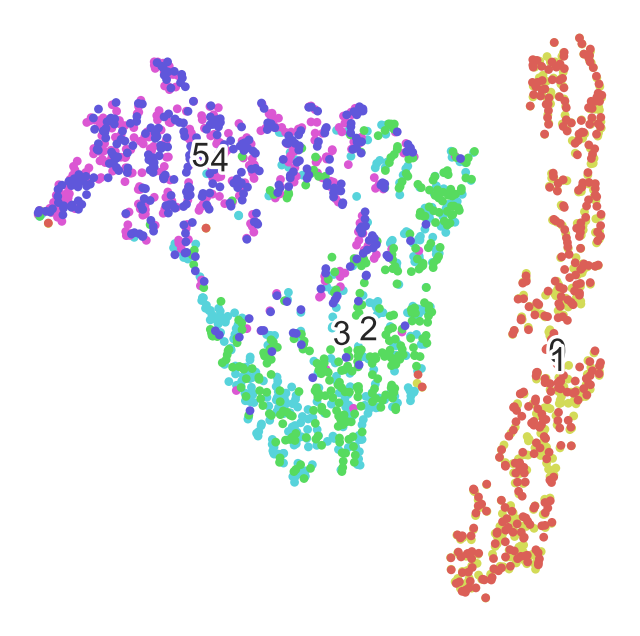

In [107]:
from sklearn.manifold import TSNE
from fashion_scatter import fashion_scatter
pca_50=PCA(n_components = 2)
pca_result_50 = pca_50.fit_transform(data)
fashion_pca_tsne = TSNE(random_state=RS).fit_transform(data)
fashion_scatter(fashion_pca_tsne, label)
em=pd.DataFrame(fashion_pca_tsne)
df_out=pd.concat([df['Local Authorities District'],em,label],axis=1)
df_out.to_excel('./2011/Projection/Tenure_projections_TSNE.xlsx')

[[ 37.973335    5.6254387]
 [ 90.84589    16.389372 ]
 [ 29.720472   11.631093 ]
 ...
 [-36.070404   30.665459 ]
 [-74.535255  -10.853261 ]
 [-21.106009   61.571323 ]]


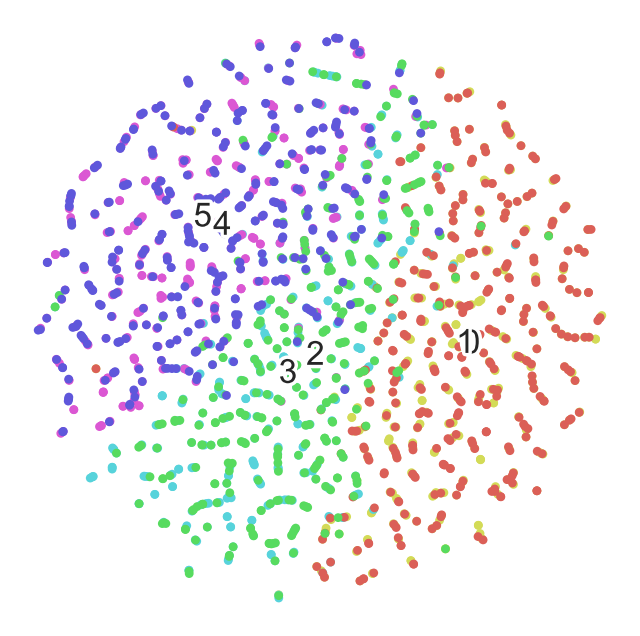

In [108]:
fashion_pca_tsne_2 = TSNE(random_state=RS, perplexity=2).fit_transform(pca_result_50)
fashion_scatter(fashion_pca_tsne_2, label)
print(fashion_pca_tsne_2)